# Plotting with vsketch and AxiDraw

By [Allison Parrish](https://www.decontextualize.com/)

This notebook goes over the basics of using an [AxiDraw](https://axidraw.com/) pen plotter to plot [vsketch](https://vsketch.readthedocs.io/en/latest/index.html) drawings within Jupyter Notebook.

Note that for this to work, you need to be running Jupyter Notebook as a local installation—running it on (e.g.) Google Colab or Binder won't work! The Python code needs to communicate directly with your computer's USB port in order to communicate with the plotter.

## The basics

My first recommendation would be to read [the AxiDraw user guide](https://wiki.evilmadscientist.com/AxiDraw_User_Guide) for your model of plotter. You're probably not going to break the plotter, but they are fickle and fragile things and it's easy to accidentally mess something up or get yourself into a situation where you're not sure why things aren't working.

Here are my highlights from the manual:

* Don't pick the plotter up by the cable guides! Pick it up using the base only.
* There are lots of moving parts—tie up your hair before using the plotter so you don't get sucked in. Also, watch your fingers!
* When you're finding a place to set up the plotter, make sure you have enough clearance on both sides for the X-axis carriage.
* It's safe to move the carriage, but *only* while the stepper motors aren't engaged. (See below for instructions on how to enter `align` mode, which turns off the motors.)
* The plotter can move very precisely, but it *can't* sense its own position. Whenever you issue a command to the plotter to move, it's relative from what was most recently considered to be "home"—which might not be the same thing as the absolute limit of the plotter's range of motion.
* You can change the orientation of the pen clip (vertical or 45 degrees), depending on the writing implement you want to use. You'll need the hex wrench that comes with the plotter to do this.

Note that you don't *have* to use Python to use the AxiDraw plotter! There is also a very friendly [plugin for Inkscape](https://wiki.evilmadscientist.com/Axidraw_Software_Installation), which gives you a nice GUI interface. Using Python makes things a bit easier for a generative art-centric workflow, but there's no reason not to use the GUI if you find it more suitable.

## Preliminaries

To use the AxiDraw with Python, you need to install the [AxiDraw Python API](https://axidraw.com/doc/py_api/). Installing this will also install the [AxiDraw CLI](https://axidraw.com/doc/cli_api/#introduction), which we'll also make use of in this tutorial. Use the following cell:

In [ ]:
import sys
!{sys.executable} -m pip install https://cdn.evilmadscientist.com/dl/ad/public/AxiDraw_API.zip

We'll also be using vsketch and Bezmerizing. See previous tutorials in this series for instructions on installing those libraries. Import them like so:

In [82]:
import vsketch
import random
import bezmerizing

At this point, you'll want to move the AxiDraw to its home position, and then plug in the power adapter and the USB cable. Set up the easel with a piece of paper and insert a pen.

## Simple plots

The easiest way to plot with AxiDraw is to plot from an SVG file. To show how to do this, I'm going to make a quick drawing with vsketch:

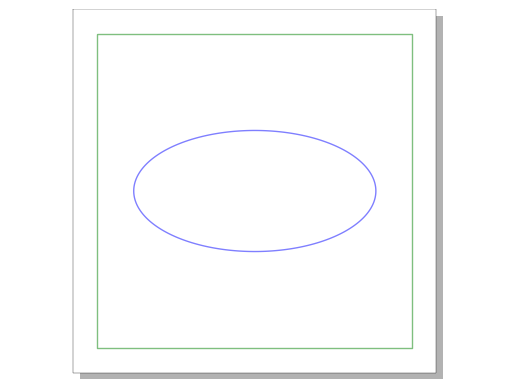

In [41]:
vsk = vsketch.Vsketch()
vsk.size("150mm", "150mm")
vsk.scale("1mm")
vsk.stroke(1)
vsk.ellipse(75, 75, 100, 50)
vsk.stroke(2)
vsk.rect(10, 10, 130, 130)
vsk.display()

And then save it as `.svg` using the vsketch `.save()` method:

In [42]:
vsk.save("test.svg")

### Helpful commands

Before we actually plot anything, I want to show you a few helpful commands that let you change the state of the device. The first important command is `mode align`, which puts the AxiDraw into `align` mode—this lets you move the carriage freely in order to place the pen in the desired location over your paper:

In [56]:
!axicli --mode align

If you add `--mode cycle`, the plotter will additionally lower and raise the pen, so you can see its range of motion:

In [49]:
!axicli --mode align --mode cycle

Finally, the `--mode manual -M lower_pen` command will lower the pen. This is helpful for making sure that your pen is placed in such a way that it will actually make contact with the paper:

In [48]:
!axicli --mode manual -M lower_pen

Using `-M raise_pen` will raise the pen again:

In [ ]:
!axicli --mode manual -M lower_pen

### Plotting from a file

To plot from a file using the Python API, initialize the `AxiDraw` object, and call `.plot_setup()` with the same of the SVG file to plot. Then call `.plot_run()`. Voila!

In [51]:
ad = axidraw.AxiDraw()

In [52]:
ad.plot_setup("test.svg")

In [53]:
ad.plot_run()

If you need to interrupt the plot, simply interrupt the Python cell, then run the `align` command to turn off the stepper motors: 

In [ ]:
!axicli --mode align

### Plotting with layers

You'll notice that the above command plots *all* paths in the SVG file. The `vsketch` library lets you specify different "pens" to draw with, which are stored in the SVG file as different numbered layers. If you want to plot each layer separately, use the `mode` and `layer` attributes of the AxiDraw object's `options`. For example, the following cell will plot only layer 1 (vsketch's pen 1) from the SVG file:

In [54]:
ad.plot_setup("test.svg")
ad.options.mode = "layers"
ad.options.layer = 1
ad.plot_run()

When that plot is complete, you can switch out the pen in the plotter and draw layer 2 (vsketch's pen 2):

In [55]:
ad.plot_setup("test.svg")
ad.options.mode = "layers"
ad.options.layer = 2
ad.plot_run()

The `.options` attribute has many other settings that you can adjust, many of which can be helpful when working with particular kinds of pens, or to optimize the plotting process. See the [full list here](https://axidraw.com/doc/py_api/#options-plot).

## Interactive mode

The plotter also has an "interactive mode," which lets you send movement commands directly to the AxiDraw with Python function calls. To use this, call the `.interactive()` and `.connect()` methods of the `AxiDraw` object.

In [119]:
from pyaxidraw import axidraw

In [89]:
ad = axidraw.AxiDraw()
ad.interactive()
ad.connect()

True

Moving the pen up and down:

In [59]:
ad.pendown()

In [91]:
ad.penup()

Set to the unit you want (see [full list](https://axidraw.com/doc/py_api/#units))

In [106]:
ad.options.units = 2 # millimeters

The `.goto()` method moves to a particular position:

In [75]:
for i in range(5):
    ad.penup()
    ad.goto(random.randrange(0, 150), random.randrange(0, 150))
    ad.pendown()
    ad.goto(random.randrange(0, 150), random.randrange(0, 150))
ad.penup()

Return home:

In [92]:
ad.goto(0, 0)

The `.moveto()` and `.lineto()` methods guarantee that the pen is in a particular position:

In [70]:
for i in range(5):
    ad.moveto(75, 75)
    ad.lineto(random.randrange(0, 150), random.randrange(0, 150))
ad.penup()
ad.moveto(0, 0)

Let's make a glyph!

In [103]:
import itertools
def create_figure():
    # a 3x4 grid
    all_pts = list(itertools.product([20, 75, 130], [20, 75, 130]))
    # pick some number of points from the grid
    pts = random.sample(all_pts, random.randrange(6, 10))
    return pts

In [111]:
fig = create_figure()
curve = bezmerizing.Polyline(fig).catmull_spline(-0.5)
curve_pts = curve.to_polyline(20)

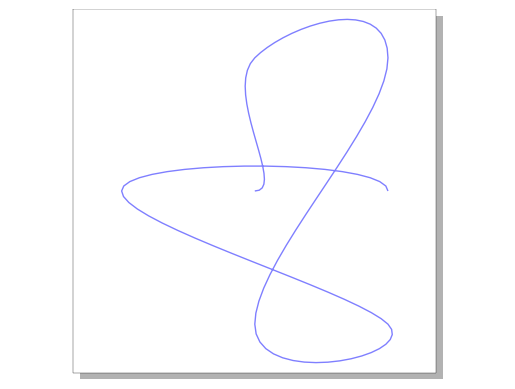

In [109]:
vsk = vsketch.Vsketch()
vsk.size("150mm", "150mm", center=False)
vsk.scale("1mm")
vsk.polygon(curve_pts)
vsk.display()

Draw this using only `lineto()`:

In [110]:
ad.moveto(curve_pts[0][0], curve_pts[0][1])
for pt1, pt2 in zip(curve_pts[1:-1], curve_pts[2:]):
    ad.lineto(pt2[0], pt2[1])
ad.moveto(0, 0)

Or also:

In [113]:
ad.draw_path(curve_pts)

Putting it all together and making a mess:

In [116]:
ad.moveto(0, 0)

In [115]:
for i in range(5):
    fig = create_figure()
    curve = bezmerizing.Polyline(fig).catmull_spline(-0.5)
    curve_pts = curve.to_polyline(20)
    ad.draw_path(curve_pts)

Reset to align mode to turn off stepper motors:

In [117]:
!axicli --mode align

When you're done, disconnect:

In [80]:
ad.disconnect()